**Sentiment Analysis on Social Media Data**


This project explores sentiment patterns in Twitter posts related to various brands and topics using a labeled dataset. The analysis focused on three key sentiments: Positive, Negative, and Neutral. After cleaning and preprocessing the dataset, we used visualizations to uncover trends and insights in public opinion.

The sentiment distribution chart revealed that Neutral tweets were the most common overall, followed by Positive and then Negative tweets. This suggests that while users frequently discuss brands, many of these conversations are descriptive or informational rather than emotionally charged.


When breaking down sentiment by topic, certain brands showed distinct patterns. For example, technology and gaming brands like League of Legends and Call of Duty had a significant volume of tweets, with a notable mix of both Positive and Negative sentiments, reflecting polarized opinions from engaged communities. In contrast, brands like Verizon had a higher proportion of Negative tweets, indicating potential dissatisfaction or public frustration.


Word clouds generated for each sentiment highlighted frequently used words. Positive tweets commonly included words like “love,” “awesome,” and “thank,” suggesting appreciation and enjoyment. Negative tweets often included words such as “hate,” “worst,” and “broken,” reflecting user complaints and criticism.


To further explore sentiment trends, we visualized sentiment as a percentage of total tweets per topic. This revealed that while some brands had high volumes of tweets, the proportion of Positive or Negative sentiment varied significantly, offering a deeper view of public perception beyond raw counts.


Overall, these visualizations provided a clear picture of how different topics and brands are perceived on social media, highlighting where sentiment is strongly divided or skewed.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('twitter.csv', encoding='ISO-8859-1', header=None)


In [4]:
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       74682 non-null  int64 
 1   1       74682 non-null  object
 2   2       74682 non-null  object
 3   3       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
df.describe()

,0
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [7]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,686


In [8]:
df.columns = ['ID', 'Topic', 'Sentiment', 'Text']


In [9]:
df = df.dropna(subset=['Text'])


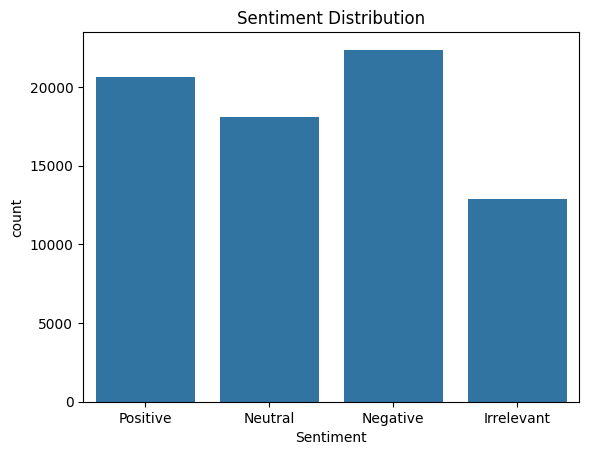

In [10]:

sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


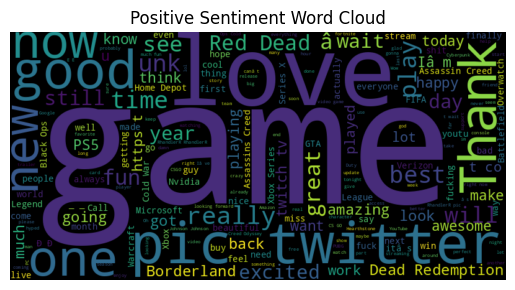

In [11]:
from wordcloud import WordCloud

positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Text'])
wordcloud = WordCloud(width=800, height=400).generate(positive_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiment Word Cloud")
plt.show()


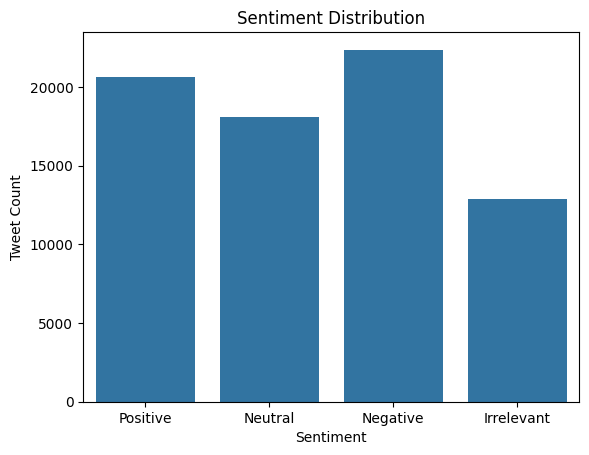

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()


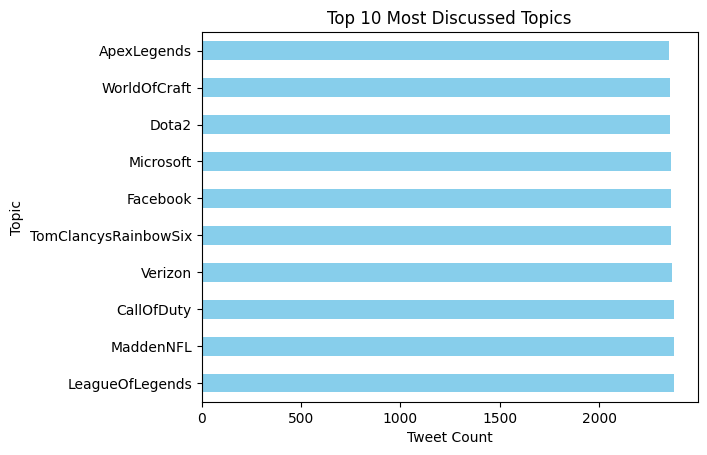

In [13]:
top_topics = df['Topic'].value_counts().head(10)
top_topics.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Discussed Topics')
plt.xlabel('Tweet Count')
plt.ylabel('Topic')
plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ApexLegends'),
  Text(1, 0, 'CallOfDuty'),
  Text(2, 0, 'Dota2'),
  Text(3, 0, 'Facebook'),
  Text(4, 0, 'LeagueOfLegends'),
  Text(5, 0, 'MaddenNFL'),
  Text(6, 0, 'Microsoft'),
  Text(7, 0, 'TomClancysRainbowSix'),
  Text(8, 0, 'Verizon'),
  Text(9, 0, 'WorldOfCraft')])

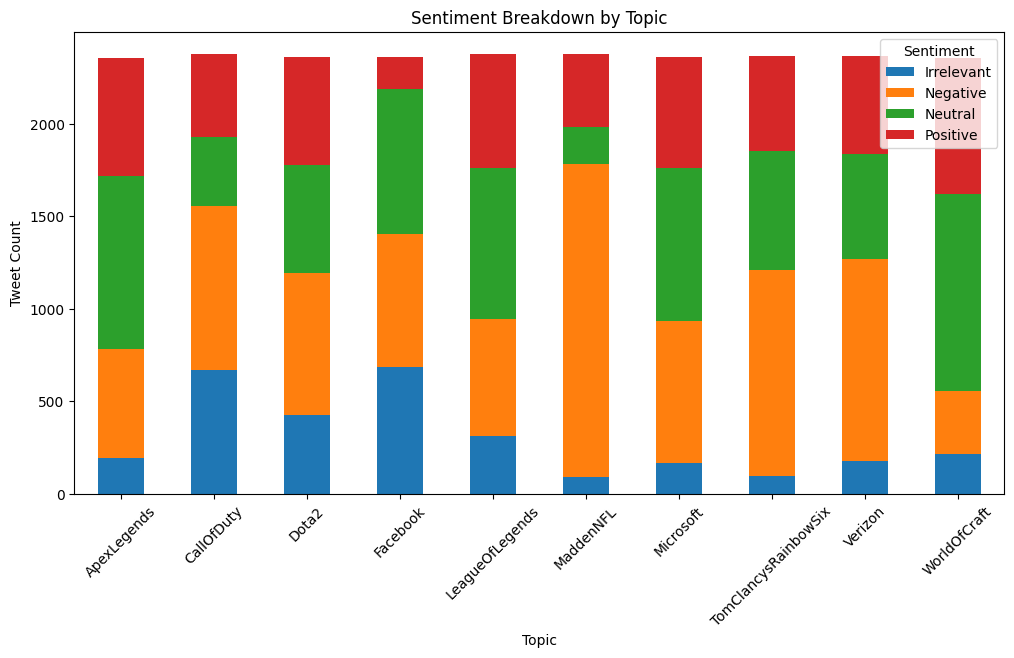

In [15]:
# Step 1: Get top 10 topics
top_topics = df['Topic'].value_counts().head(10).index.tolist()

# Step 2: Filter the DataFrame to include only these topics
df_top = df[df['Topic'].isin(top_topics)]

# Step 3: Create the sentiment breakdown
topic_sentiment = df_top.groupby(['Topic', 'Sentiment']).size().unstack().fillna(0)

# Step 4: Plot
topic_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Breakdown by Topic')
plt.xlabel('Topic')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)


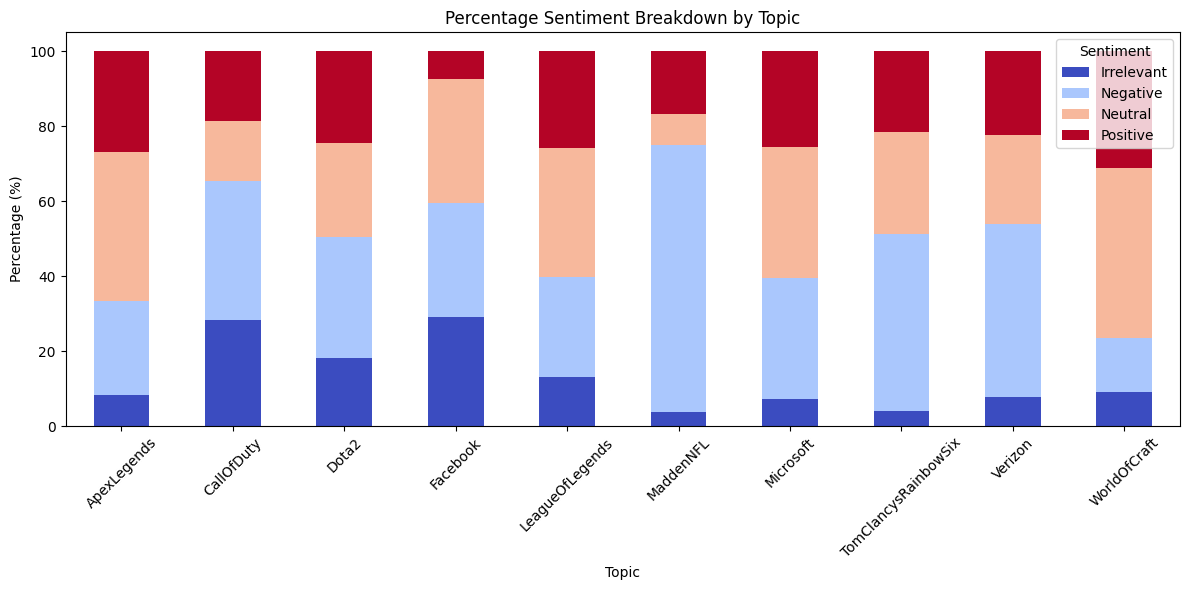

In [17]:
# Normalize to percentage
percent_sentiment = topic_sentiment.div(topic_sentiment.sum(axis=1), axis=0) * 100

# Plot
percent_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Percentage Sentiment Breakdown by Topic')
plt.xlabel('Topic')
plt.ylabel('Percentage (%)')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [18]:
# Show long positive tweets
positive_tweets = df[df['Sentiment'] == 'Positive']
print("Sample Positive Tweets:")
print(positive_tweets['Text'].sample(5, random_state=1))

# Show long negative tweets
negative_tweets = df[df['Sentiment'] == 'Negative']
print("\nSample Negative Tweets:")
print(negative_tweets['Text'].sample(5, random_state=2))


Sample Positive Tweets:
26942    No cap, it looks very intriguing! I'm super hy...
6173     The Super Network is the only time I look at w...
46966    x Is this insane? . . Was curious what the hig...
190      the Jumping on stream early today! Playing som...
59911                               HAHAHA this is cute...
Name: Text, dtype: object

Sample Negative Tweets:
56347    @ Rainbow6Game For some reason, after I have i...
55582                                       Lit x timesss.
15004               That server is down, pls fix it @DOTA2
13247      Hold onnnn. fw 2k it might make glitchy all tho
28211    @PlayApex why has audio never even fixed... it...
Name: Text, dtype: object


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Step 1: Encode labels
df = df[df['Sentiment'].isin(['Positive', 'Negative', 'Neutral'])]
X = df['Text']
y = df['Sentiment']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Vectorize
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 4: Train model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Step 5: Evaluate
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.77      0.87      0.82      4427
     Neutral       0.86      0.69      0.77      3678
    Positive       0.80      0.82      0.81      4120

    accuracy                           0.80     12225
   macro avg       0.81      0.79      0.80     12225
weighted avg       0.81      0.80      0.80     12225

